# Исследование объявлений о продаже квартир

**Цель исследования**: установить параметры, влияющие на рыночную стоимость объектов недвижимости  

**Цель применния** :данные будут использованы для построения автоматизированной системы,  котороая будет отслеживать наличие аномалий и мошеннические деятельности

**Исходные данные**: данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Результат исследования**:подвести обобщающий вывод по всему исследованию, установить явные параметры.

## 1. Общая информация и импорт библиотек

### 1.1. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
import matplotlib.pyplot as plt

### 1.2. Общая информация 

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### 1.3. Описание данных

Данные включают в себя 23 699 строк и 22 столбца:

* 3 столбца с целочисленными данными (int64)
* 14 столбцов с числовыми данными типа (float64)
* 3 столбца типа (object)
* 2 столбца с булевым типом (bool)


**airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)  
**balcony** — число балконов  
**ceiling_height** — высота потолков (м)  
**cityCenters_nearest** — расстояние до центра города (м)  
**days_exposition** — сколько дней было размещено объявление (от публикации до снятия)  
**first_day_exposition** — дата публикации  
**floor** — этаж  
**floors_total** — всего этажей в доме 
**is_apartment** — апартаменты (булев тип)  
**kitchen_area** — площадь кухни в квадратных метрах (м²)  
**last_price** — цена на момент снятия с публикации   
**living_area** — жилая площадь в квадратных метрах(м²)  
**locality_name** — название населённого пункта   
**open_plan** — свободная планировка (булев тип)  
**parks_around3000** — число парков в радиусе 3 км  
**parks_nearest** — расстояние до ближайшего парка (м)  
**ponds_around3000** — число водоёмов в радиусе 3 км  
**ponds_nearest** — расстояние до ближайшего водоёма (м)  
**rooms** — число комнат  
**studio** — квартира-студия (булев тип)  
**total_area** — площадь квартиры в квадратных метрах (м²)  
**total_images** — число фотографий квартиры в объявлении   

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.  


### 1.4. Вывод

Разное количество значений в столбцах указывает на наличие пропусков, так же замечены несоответствие типа данных в некоторых столбцах ( balcony и тд.) На следующем этапе "Предобработка данных"  рассмотрим каждый столбец. Оценим значения столбца на  адекватность заполнения, тип данных, наличие пропусков. По-возможности заполним пропуски.


## 2. Предобработка данных 

### 2.1. Работа с каждым столбцом

**2.1.1. total_images**  — число фотографий квартиры в объявлении

In [4]:
df['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Пропущенных значений нет: 23699/23699  
Общий характер значений в столбце адекватный.Есть квартиры без фотографий, вероятнее всего пользователь либо не загрузил, либо данные слетели на этапе выгрузки.  

Выполним замену типа данных с дробного на целое:

In [5]:
df['total_images'] = df['total_images'].astype('int64')

**2.1.2. last_price**— цена на момент снятия с публикации

In [6]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Пропущенных значений нет: 23699/23699 
Общий характер значений в столбце адекватный. Смущает минимальное значение,на данном этапе оставим как есть.  

Выполним замену типа данных с дробного на целое:

In [7]:
df['last_price'] = df['last_price'].astype('int64')

**2.1.3. total_area** — площадь квартиры в квадратных метрах (м²)

In [8]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Пропущенных значений нет: 23699/23699  
Общий характер значений в столбце адекватный. 12 м²-возможно комната или студия, 900 м²- апартаменты.
    
Рассмотрим **total_area** в связке со столбцами:
* **living_area**— жилая площадь в квадратных метрах(м²)
* **kitchen_area**— площадь кухни в квадратных метрах (м²)  

Выполним следующую проверку площадей квартир,  в которых площадь квартиры может оказаться меньше суммы  площадей кухни и жилой зоны:

In [9]:
df.loc[((df['living_area']+df['kitchen_area'])>df['total_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
545,9,4700000,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
551,8,3100000,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5600000,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0
696,1,3364930,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,NaN,...,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,NaN,...,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0


Выяснить откуда появилась ошибка и исправить нет возможности. Невозможно определить в каком из 3 столбцов или во всех из них лежат некорректные данные. Может люди не понимали разницу между жилой и общей площадью, может ошибка на этапе записи данных.  Таких позиций-64. Оставим данные как есть, другие столбцы могут содержать информативные данные, но исключим эти позиции, когда будем работать с этими столбцами

**2.1.4. first_day_exposition** —  дата публикации

In [11]:
df['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Пропущенных значений в столбце нет:23699/23699 

Приведем к формату %Y-%m-%d.

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT')

**2.1.5. rooms**— число комнат

In [13]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Пропущенных значений нет:23699/23699  
Общий характер значений в столбце адекватный, кроме минимального значения

Согласно СП(свод правил, ранее СНиП) минимальная площадь для однокомнатной квартиры  составит 28 метров, для двухкомнатной – 44, для трехкомнатной – 56, для четырехкомнатной – 70, для пятикомнатной – 84 и, наконец, для шестикомнатного «поместья» – 103 квадратных метра.  

Посмотрим на распределение total_area при rooms=1

In [15]:
df.loc[df['rooms'] == 1].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,8047.000000,8.047000e+03,8047.000000,8047.0,4613.000000,8015.000000,7388.000000,8047.000000,7213.000000,4228.000000,5883.000000,5888.00000,5888.000000,2278.000000,5888.000000,2848.000000,7273.000000
mean,9.135578,3.835362e+06,37.644669,1.0,2.716267,12.639301,17.893552,6.932770,9.550118,1.096263,29765.009859,15658.45873,0.507303,506.917032,0.696501,532.682935,158.909391
std,5.323550,1.899944e+06,9.338358,0.0,1.640600,7.013679,3.448422,5.448818,3.311955,0.873583,13433.472382,7986.94307,0.734235,366.507462,0.866162,280.473182,198.636191
min,0.000000,4.300000e+05,12.000000,1.0,1.750000,1.000000,3.000000,1.000000,1.300000,0.000000,0.000000,208.00000,0.000000,4.000000,0.000000,19.000000,2.000000
25%,5.000000,2.900000e+06,32.500000,1.0,2.500000,6.000000,16.000000,3.000000,7.200000,0.000000,17924.500000,11486.75000,0.000000,287.250000,0.000000,315.000000,39.000000
50%,9.000000,3.600000e+06,36.560000,1.0,2.640000,11.000000,17.600000,5.000000,9.040000,1.000000,29305.000000,14265.00000,0.000000,455.000000,0.000000,511.000000,81.000000
75%,13.000000,4.450000e+06,41.000000,1.0,2.750000,17.000000,19.000000,10.000000,11.000000,2.000000,39622.000000,17172.00000,1.000000,629.000000,1.000000,749.000000,199.000000
max,30.000000,4.351100e+07,494.100000,1.0,100.000000,52.000000,60.000000,31.000000,58.400000,5.000000,78527.000000,60223.00000,3.000000,3190.000000,3.000000,1344.000000,1512.000000


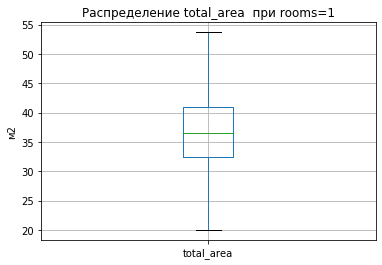

In [16]:
(df.query('rooms==1')).boxplot('total_area',showfliers=False)
plt.title('Распределение total_area  при rooms=1')
plt.ylabel('м2')
plt.show()

Большая часть однокомнатных квартир лежит в диапазоне (19,75 м2-53,75 м2)-это граница нормального размаха

>минимальная площадь для однокомнатной квартиры составит 28 метров, для двухкомнатной – 44

Примем, что квартиры площадью не более 41 м2 (3 квартиль) имеют 1 комнату, т.к. это значение не превышает минимальную норму для двухкомнатных квратир по СП.


In [17]:
df.loc[(df['rooms'] == 0) & (df['total_area'] <= 41), 'rooms'] = 1
print('Колличество квартир с rooms = 0 :', len(df.loc[(df['rooms'] == 0)]))

Колличество квартир с rooms = 0 : 9


Оставшиеся 9 квартир на данном этапе оставим.  

Выполним замену типа данных с дробного на целое:

In [18]:
df['rooms'] = df['rooms'].astype('int64')

**2.1.6. ceiling_height** — высота потолков (м)

In [19]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Пропущенные значения есть: 14504/23699  
Общий характер значений в столбце адекватный. Смущают правда минимальный и максимальные значения. Высота потолков не такой значимый параметр для обычных обывателей сталинок и хрущевок, скорее всего данные просто не внесли.  Пропущенных данных много,а заполнение по средним или медианным значениям могут внести искажения при оценке данного параметра. На данном этапе оставим значения пустыми

**2.1.7. floors_total** — всего этажей в доме

In [20]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Пропущенные значения есть: 23613/23699  
Общий характер значений в столбце адекватный.Вероятнее всего пользователь не добавил информацию. На данном этапе оставим значения пустыми

**2.1.8. living_area** — жилая площадь в квадратных метрах(м²)

In [21]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Пропущенные значения есть: 21796/23699
Общий характер значений в столбце адекватный. Для жилой площади 2 м²-это очень мало,пока пропустим. На данном этапе оставим пропущенные значения пустыми

**2.1.9 floor**— этаж

In [22]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Пропущенных значений нет: 23699/23699  
Общий характер значений в столбце адекватный.  

Выполним замену типа данных с дробного на целое:

In [23]:
df['floor'] = df['floor'].astype('int64')

**2.1.10. is_apartment**—апартаменты (булев тип)

In [24]:
df['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

Пропущенные значения есть: 2775/23699

Вероятнее всего владелец проигнорировал этот пункт, так как его помещение не относится к этопу типу. Выполним заполнение значением False

In [25]:
df['is_apartment'] = df['is_apartment'].fillna(False)

Выполним замену типа данных с дробного на булевой:

In [26]:
df['is_apartment'] = df['is_apartment'].astype('bool')

**2.1.11. studio**— квартира-студия (булев тип)

In [27]:
df['studio'].describe()

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

Пропущенных значений нет: 23699/23699

Выполним замену типа данных с дробного на булевое:

In [28]:
df['studio'] = df['studio'].astype('bool')

**2.1.12. open_plan**— свободная планировка (булев тип)

In [29]:
df['open_plan'].describe()

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

Пропущенных значений нет: 23699/23699

Выполним замену типа данных с дробного на булевое:

In [30]:
df['open_plan'] = df['open_plan'].astype('bool')

**2.1.13. kitchen_area** — площадь кухни в квадратных метрах (м²)

In [31]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Пропущенные значения есть: 21421/23699  
Общий характер значений в столбце адекватный. Для площади кухни 1,3 м²-это очень мало,пока пропустим. На данном этапе оставим пропущенные значения пустыми


**2.1.14.balcony**— количество балконов

In [32]:
df['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Пропущенные значения есть: 12180/23699  
Общий характер значений в столбце адекватный.Вполне возможно, что балконы в доме не подразумевались или люди просто не стали вносить информацию об их отсуствии.

Таких балконов много. Заполним пропуски 0

In [33]:
df['balcony'] = df['balcony'].fillna(0)

Выполним замену типа данных с дробного на целое:

In [34]:
df['balcony'] = df['balcony'].astype('int64')

**2.1.15.locality_name**— название населённого пункта

In [35]:
df['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [36]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Пропущенные значения есть: 23650/23699  
Общий характер значений в столбце адекватный. Присуствует различное написание букв "е" и "ё" в слове "поселок", а так же дублирование населенных пунктов( посёлок Мурино и Мурино и деревня Кудрово и Кудрово). На данном этапе оставим пропущенные  значения пустыми

Напишем функции:
* замена  "посёлок" на "поселок" 
* посёлок Мурино на Мурино; деревня Кудрово на Кудрово

In [37]:
def rename_dic(name):
    if str(name) == 'nan':
        return
    
    new_name = name.split(' ')
    
    spb_dic = ['Мурино', 'Кудрово']
    
    
    if new_name[0] == 'посёлок':
        new_name[0] = 'поселок'
    
    
    for i in spb_dic:
        if i in new_name:
            return i
        
    return ' '.join(new_name)

In [38]:
df['locality_name'] = df['locality_name'].apply(rename_dic)

**2.1.16. airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)

In [39]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Пропущенные значения есть: 18157/23699
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.


**2.1.17. cityCenters_nearest**— расстояние до центра города (м)

In [40]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Пропущенные значения есть: 18180/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.


 **2.1.18. parks_around3000**-число парков в радиусе 3 км

In [41]:
df['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

Пропущенные значения есть: 18181/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.


**2.1.19. parks_nearest**— расстояние до ближайшего парка (м)

In [42]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Пропущенные значения есть: 8079/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.


**2.1.20. ponds_around3000** — число водоёмов в радиусе 3 км

In [43]:
df['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

Пропущенные значения есть: 18181/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.

**2.1.21. ponds_nearest**— расстояние до ближайшего водоёма (м)

In [44]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Пропущенные значения есть: 9110/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть.

**2.1.22. days_exposition**— сколько дней было размещено объявление (от публикации до снятия)

In [45]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропущенные значения есть: 20518/23699  
Общий характер значений в столбце адекватный.Вероятнее всего владельцы либо не указали информацию, либо данные слетели на этапе выгрузки. На данном этапе оставим пропуски как есть. Мы не владеем информацией о продаже недвижимости, возможно "nan" это незакрытые объявления.


### 2.2. Проверка на наличие дубликатов

In [46]:
if df.duplicated().sum()==0:
    print("Дубликатов нет")
else:
    print('Количество дубликатов:',df.duplicated().sum())

Дубликатов нет


### 2.3. Вывод

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Во многих столбцах остались пропуски без возможности заполнения. Есть крайне странные значения, о которых нельзя забывать при последующем анализе.
* **total_images** -  все отлично
* **last_price**- очень маленькая минимальная сумма
* **total_area**-  все отлично, но есть 64 квартиры с некорректными площадями
* **first_day_exposition**- все отлично
* **rooms**- осталось 9 квартир с количеством комнат=0
* **ceiling_height**- 1) много пропусков, без восстановления; 2) очень низкое минимальное и высокое максимальное значение
* **floors_total**-есть пропущенные значения, без восстановления
* **living_area**-есть пропущенные значения, без восстановления; 2) очень низкое минимальное и высокое максимальное значение
* **floor**- все отлично
* **is_apartment**- все отлично
* **studio**-все отлично
* **open_plan**- все отлично
* **kitchen_area**-есть пропущенные значения, без восстановления; 2) очень низкое минимальное значение
* **balcony**- все отлично
* **locality_name**- есть пропущенные значения, без восстанавления
* **airports_nearest**-есть пропущенные значения, без восстановления
* **cityCenters_nearest**-есть пропущенные значения, без восстановления
* **parks_around3000**- есть пропущенные значения, без восстановления
* **parks_nearest**-есть пропущенные значения, без восстановления
* **ponds_around3000**-есть пропущенные значения, без восстановления
* **ponds_nearest****-есть пропущенные значения, без восстановления
* **days_exposition**-есть пропущенные значения, без восстановления

##  3. Добавление дополнительных данных в таблицу

**3.1.  Цена квадратного метра**

Цена квадратного метра - это соотношение цены [**last_price**]  к общей площади [**total_area**].  
Добавим к df столбец [**price_1_meter**]-цена квадратного метра и выполним замену типа данных с дробного на целое.

In [48]:
df['price_1_meter'] = df['last_price'] / df['total_area']
df['price_1_meter'] = df['price_1_meter'].astype('int64')

Проверим, как получилось:
    

In [49]:
df.loc[:,['total_area','last_price','price_1_meter']].head(5)

,total_area,last_price,price_1_meter
0,108.0,13000000,120370
1,40.4,3350000,82920
2,56.0,5196000,92785
3,159.0,64900000,408176
4,100.0,10000000,100000


**3.2. День недели, месяц и год публикации объявления**

Воспользуемся методом dt.weekday(пн — день под номером 0, а вск — 6), dt.month и dt.year. Сохраним значения в столбцах [**weekday_exposition**], [**month_exposition**], [**year_exposition**]


In [50]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Посмотрим, что получилось.

In [51]:
df.loc[:,['first_day_exposition','weekday_exposition','month_exposition', 'year_exposition']].head(1)

,first_day_exposition,weekday_exposition,month_exposition,year_exposition
0,2019-03-07,3,3,2019


**3.3. Этаж квартиры; варианты — первый, последний, другой**

Напишем функцию для определения категории этажа квартиры: первый, последний и другой.

In [52]:
def floor_category(row):
    
    floor=row['floor']
    floors_total= row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [53]:
df['floor_category'] = df.apply(floor_category, axis=1)

Посмотрим, что получилось

In [54]:
df.loc[:,['floor_category','floor','floors_total']]

,floor_category,floor,floors_total
0,другой,8,16.0
1,первый,1,11.0
2,другой,4,5.0
3,другой,9,14.0
4,другой,13,14.0
...,...,...,...
23694,другой,3,5.0
23695,другой,4,5.0
23696,первый,1,3.0
23697,другой,12,17.0


**3.4. Cоотношение жилой и общей площади, а также отношение площади кухни к общей.**

Добавим к df столбцы 
* [**living_to_total**]-cоотношение жилой и общей площади
* [**kitchen_to_total**]-отношение площади кухни к общей площади

In [55]:
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

Посмотрим, что получилось:

In [56]:
df=df.round({'living_to_total':2, 'kitchen_to_total':2})
df.loc[:,['living_to_total','kitchen_to_total',]].head(1)

,living_to_total,kitchen_to_total
0,0.47,0.23


## 4. Проведение исследовательского анализа данных

### 4.1. Изучение следующих параметров: площадь, цена, число комнат, высота потолков. Построение гистограммы для каждого параметра.

Напишем функцию для определения "нижнего и верхнего уса" boxplot

In [57]:
def info(column):
    table=df[column].describe()
    if table[4]-1.5*(table[6]-table[4])<table[3]:
        print("Нижний ус:",table[3])
    else:
        print("Нижний ус:",table[4]-1.5*(table[6]-table[4]))

    table=df[column].describe()
    print("Верхний ус:",table[6]+1.5*(table[6]-table[4]))

**4.1.1. Площадь**

In [58]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Нижний ус: 12.0
Верхний ус: 114.75000000000001


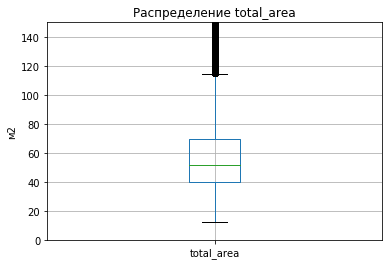

In [59]:
info('total_area')
plt.title('Распределение total_area')
df.boxplot('total_area')
plt.ylim(0, 150)
plt.ylabel('м2')
plt.show()

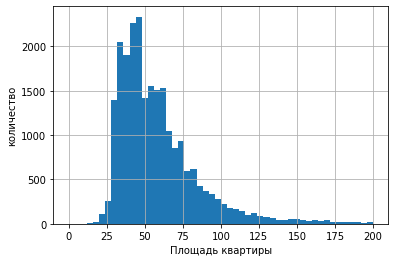

In [60]:
df['total_area'].hist(bins=50,range=(0,200))
plt.xlabel('Площадь квартиры')
plt.ylabel('количество')
plt.show()

* 23 635 значений от 12 м² до 900 м²
* Распределение близко к распределению Пуассона
* Медианное значение (52.0 ) меньше среднего (60.4).Это обусловлено тем, что есть небольшая доля квартир с очень большими площадями 
* Стандартное отклонение велико (35.6), следовательно большой разброс данных
* Границей нормального размаха считаем диапазон (12.0÷115.0)

**4.1.2. Цена**

In [61]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Нижний ус: 12190.0
Верхний ус: 11900000.0


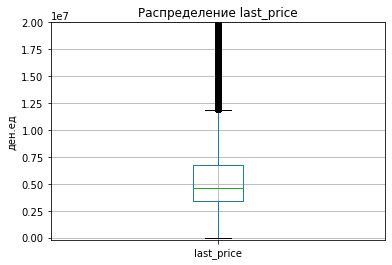

In [62]:
info('last_price')
plt.title('Распределение last_price')
df.boxplot('last_price')
plt.ylabel('ден.ед')
plt.ylim(-2.0e+05, 2.000000e+07)
plt.show()

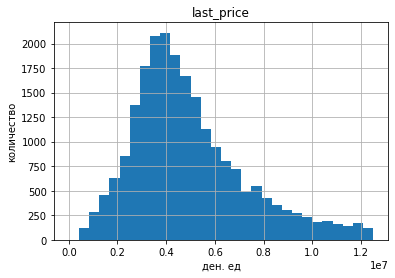

In [63]:
df.hist('last_price', bins=30,range=(0,12500000))
plt.xlabel('ден. ед')
plt.ylabel('количество')
plt.show()

   
* 23 635 значений от 12 190 ден.ед  до 763 000 000 ден.ед.
* Распределение близко к распределению Пуассона
* Медианное значение (4 650 000) меньше среднего (6 545 409).Это обусловлено тем, что есть небольшая доля очень дорогих квартир
* Стандартное отклонение велико (10 900 590)
* Границей нормального размаха считаем диапазон (12 190 ÷ 11 891 750)
    

**4.1.3. Число комнат**

In [64]:
df['rooms'].describe()

count    23699.000000
mean         2.078569
std          1.066759
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Нижний ус: 0.0
Верхний ус: 6.0


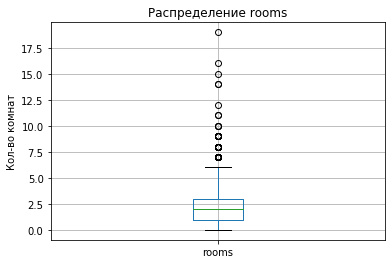

In [65]:
info('rooms')
plt.title('Распределение rooms')
df.boxplot('rooms')
plt.ylabel('Кол-во комнат')
plt.show()

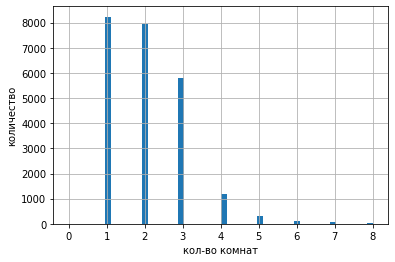

In [66]:
df['rooms'].hist(bins=50, range=(0,8))
plt.xlabel('кол-во комнат')
plt.ylabel('количество')
plt.show()

* 23 635 значений от 0  до 19 комнат
* Распределение близко к распределению Пуассона
* Медианное значение (2) очень близко к среднему  (2.07)
* Стандартное отклонение отличное (1.07)
* Границей нормального размаха считаем  не диапазон (0÷6), а 1÷6,от 10 квартир  с 0 квартирами мы так и не избавились.


График полностью описывает средстатистические квартиры. Самые популярные 1 и 2 комнатные, за ними следуют 3-х комнатные

**4.1.4. Высота потолков**

In [67]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Нижний ус: 2.1000000000000005
Верхний ус: 3.2199999999999998


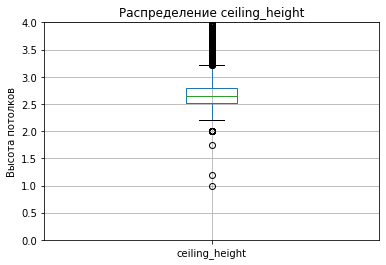

In [68]:
info('ceiling_height')
plt.title('Распределение ceiling_height')
df.boxplot('ceiling_height')
plt.ylabel('Высота потолков')
plt.ylim(0,4)
plt.show()

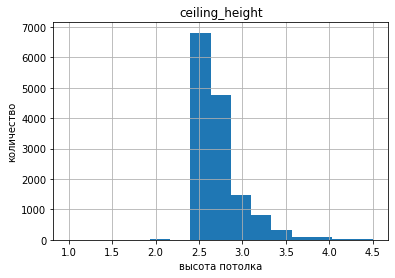

In [69]:
df.hist('ceiling_height', bins=15, range=(1,4.5) )
plt.xlabel('высота потолка')
plt.ylabel('количество')
plt.show()

* 14 462 значений от 1 м  до 100 м
* Распределение близко к распределению Пуассона
* Медианное значение (2.65) очень близко к среднему  (2.77)
* Стандартное отклонение велико (1.2)
* Границей нормального размаха считаем диапазон (2.1÷3.2)  

Большинство значений лежит в диапазоне 2.52÷2.80. *По нормам минимальная высота потолков: на кухне и в жилых комнатах - не менее 2,5-2,7 метра, в зависимости от климатического района. В коридоре, в прихожих,в холлах - 2,1 метра.*


### 4.2. Изучение времени продажи квартиры. Построение гистограммы. Вывод

In [70]:
df['days_exposition'].describe(percentiles=[0.1,0.25,0.75,0.9])

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
10%         17.000000
25%         45.000000
50%         95.000000
75%        232.000000
90%        460.000000
max       1580.000000
Name: days_exposition, dtype: float64

Нижний ус: 1.0
Верхний ус: 512.5


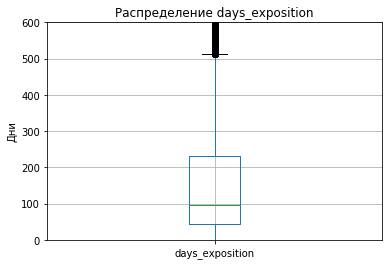

In [71]:
info('days_exposition')
plt.title('Распределение days_exposition')
df.boxplot('days_exposition')
plt.ylabel('Дни')
plt.ylim(0,600)
plt.show()

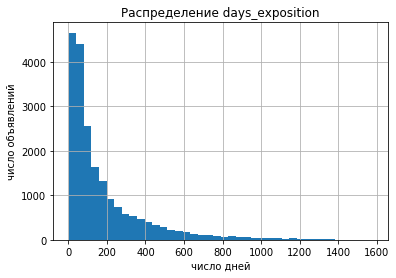

In [72]:
df.hist('days_exposition', bins=40)
plt.title('Распределение days_exposition')
plt.xlabel('число дней')
plt.ylabel('число объявлений')
plt.show()

Большинство квартир проданы за срок (15 - 323 дней), но есть как очень долгие продажи (512 дней), так и сверх быстрые (1 день)  
    
* Быстрая продажа до 15 дней
* Нормальная продажа 15 - 323 дней
* Долгая продажа  более 323 дней  

Границей нормального размаха считаем диапазон (15 - 323 дней)=(10-90 процентилb), все остальное можно считать выбросами


Построим  гистограмму с границей нормального размаха

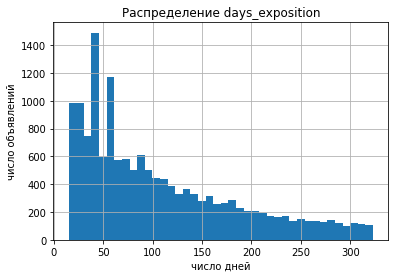

In [73]:
df.hist('days_exposition', bins=40, range=(15,323))
plt.title('Распределение days_exposition')
plt.xlabel('число дней')
plt.ylabel('число объявлений')
plt.show()

### 4.3. Избавляемся от редких и выбивающихся значений

Критерием для оценки значений выбираем - границу нормального размаха. Все остальное считаем выбросами

In [74]:
df = df.loc[(df['total_area']>= 12) & (df['total_area']<= 115)]
df = df.loc[(df['last_price']>= 1.219000e+04) & (df['last_price']<= 1.1891750e+07)]
df = df.loc[(df['rooms']>= 1) & (df['rooms']<=6)]
df = df.loc[(df['ceiling_height']>= 2.1) & (df['ceiling_height']<=3.22)]
df = df.loc[(df['days_exposition']>= 15) & (df['days_exposition']<=323)]

### 4.4. Исследование факторов, влияющих на стоимость квартиры

**4.4.1. Зависимость стоимости недвижимости от площади квартиры**

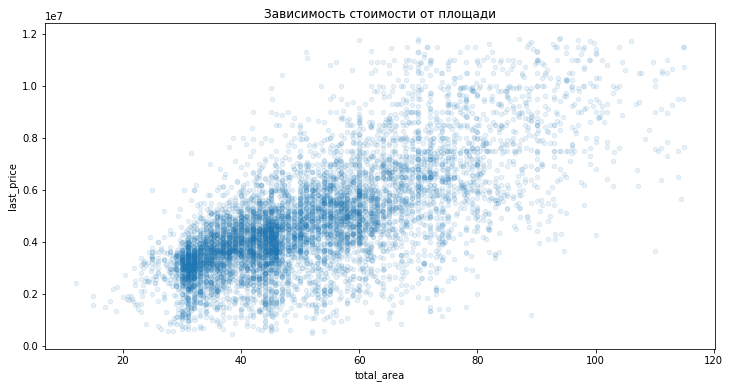

In [75]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, figsize=(12,6))
plt.title('Зависимость стоимости от площади')
plt.show()

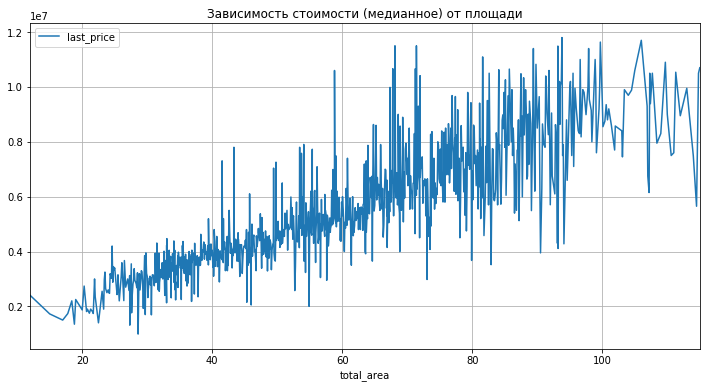

In [76]:
(df.pivot_table(index='total_area',values='last_price', aggfunc ='median' )
 .plot(grid=True, figsize=(12,6))
)
plt.title('Зависимость стоимости (медианное) от площади')
plt.show()

Рассчитаем коэффициент корреляции  Пирсона:

In [77]:
print('Коэффициент корреляции  Пирсона:',df['total_area'].corr(df['last_price']))

Коэффициент корреляции  Пирсона: 0.700230376907417


По графикам видно, что  стоимость квартиры растёт с увеличением площади.  
Коэффициент корреляции Пирсона 0.694 также подтверждает положительную зависимость. 

**4.4.2.** Зависимость стоимости недвижимости от кол-ва комнат

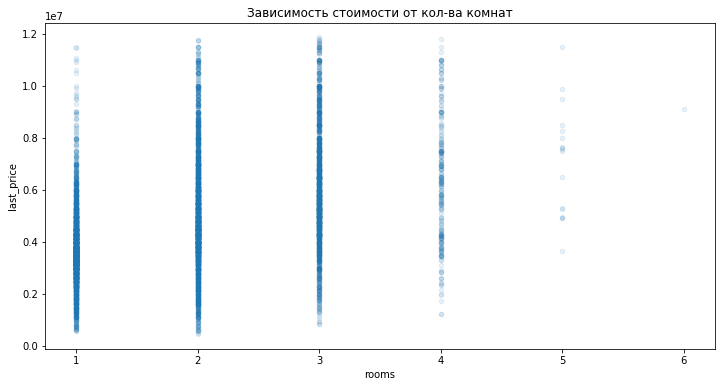

In [78]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, figsize=(12,6))
plt.title('Зависимость стоимости от кол-ва комнат')
plt.show()

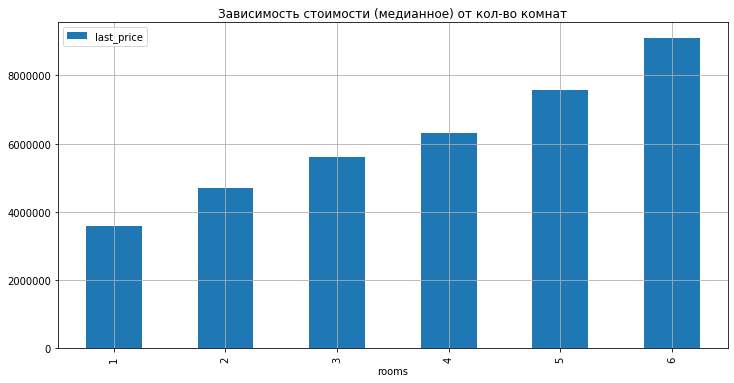

In [79]:
(df.pivot_table(index='rooms',values='last_price', aggfunc ='median' )
 .plot(grid=True, figsize=(12,6),kind='bar')
)
plt.title('Зависимость стоимости (медианное) от кол-во комнат')
plt.show()

Рассчитаем коэффициент корреляции Пирсона:

In [80]:
print('Коэффициент корреляции  Пирсона:',df['rooms'].corr(df['last_price']))

Коэффициент корреляции  Пирсона: 0.4340858064212631


По графикам видно, что  стоимость квартиры растёт с увеличением кол-ва комнат.  
Коэффициент корреляции Пирсона 0.431 также подтверждает положительную, но слабую  зависимость.Все  потому, что от площади квартиры зависит количество комнат, а стоимость квартир зависит хорошо зависит от площади квартры

Рассчитаем коэффициент корреляции Пирсона между общей площадью и кол-вом комнат:

In [81]:
print('Коэффициент корреляции  Пирсона:',df['rooms'].corr(df['total_area']))

Коэффициент корреляции  Пирсона: 0.801721405735076


Коэффициент корреляции  Пирсона 0.8, что и требовалось доказать.

**4.4.3. Зависимость стоимости недвижимости от растояния до центра города**

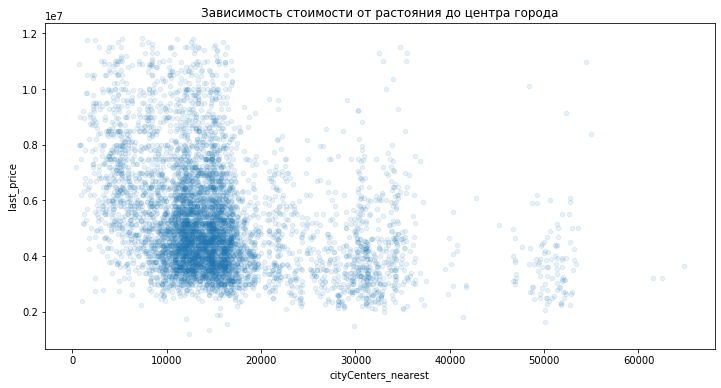

In [82]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.1,figsize=(12,6))
plt.title('Зависимость стоимости от растояния до центра города')
plt.show()

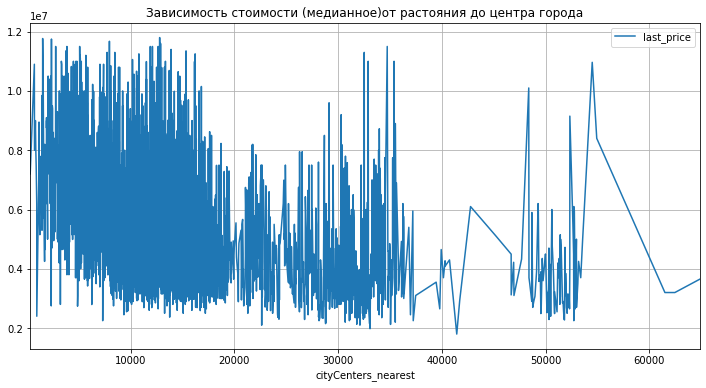

In [83]:
# СТАРЫЙ ВАРИАНТ
(df.pivot_table(index='cityCenters_nearest',values='last_price', aggfunc ='median' )
 .plot(grid=True, figsize=(12,6))
)
plt.title('Зависимость стоимости (медианное)от растояния до центра города')
plt.show()

По графику видно, что очень много квартир близко к центру, к тому же квартиры дорогие. Представим информацию в более удобном варианте, для этого разобьем расстояние до центра города на категории

Заполним пропуски 0 

In [84]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)

Выполним замену данных с дробного на целое

In [85]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int64')

 Функция для деления cityCenters_nearest  на категории

In [86]:
def cityCenters_nearest_category(row):
    
    cityCenters_nearest=row['cityCenters_nearest']
    
    if 1<cityCenters_nearest <=10000:
        return '1-10 км'
    elif 10000 < cityCenters_nearest <=20000:
        return '10-20 км'
    elif 20000 < cityCenters_nearest <=300000:
        return '20-30 км'
    elif 30000 <cityCenters_nearest <=400000:
        return '30-40 км'
    elif 40000 <cityCenters_nearest <=700000:
        return '40-70 км'
    else:
        return '>70км'

In [87]:
df['cityCenters_nearest_category'] = df.apply(cityCenters_nearest_category, axis=1)

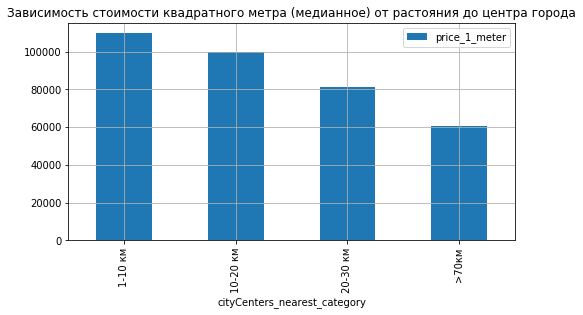

In [88]:
(df.pivot_table(index='cityCenters_nearest_category',values='price_1_meter',aggfunc ='median')
 .plot(grid=True, figsize=(8,4),kind='bar')
)
plt.title('Зависимость стоимости квадратного метра (медианное) от растояния до центра города')
plt.show()

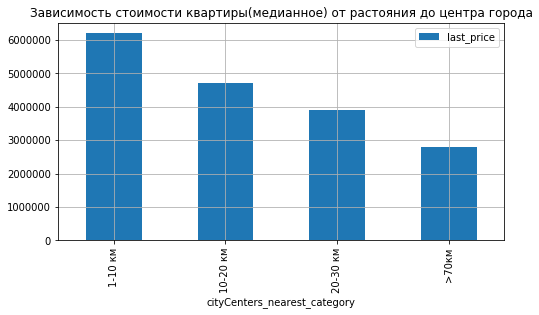

In [89]:
(df.pivot_table(index='cityCenters_nearest_category',values='last_price',aggfunc ='median')
 .plot(grid=True, figsize=(8,4),kind='bar')
)
plt.title('Зависимость стоимости квартиры(медианное) от растояния до центра города')
plt.show()

Рассчитаем коэффициент корреляции Пирсона:

In [90]:
print('Коэффициент корреляции  Пирсона между расстоянием и стоимостью:',df['cityCenters_nearest'].corr(df['last_price']))
print('Коэффициент корреляции  Пирсона между расстоянием и стоимотсью квадратного метра:',df['cityCenters_nearest'].corr(df['price_1_meter']))

Коэффициент корреляции  Пирсона между расстоянием и стоимостью: 0.10074200745836157
Коэффициент корреляции  Пирсона между расстоянием и стоимотсью квадратного метра: 0.16985912189538444


По графику видно,что чем ближе к центру, тем выше стоимость квартиры, так же выше и стоимость квадратного метра. 
Однако коэффициент корреляции Пирсона 0.09 и 0.16 показывает очень слабую зависимость 

**4.4.4. Зависимость стоимости недвижимости от этажа**

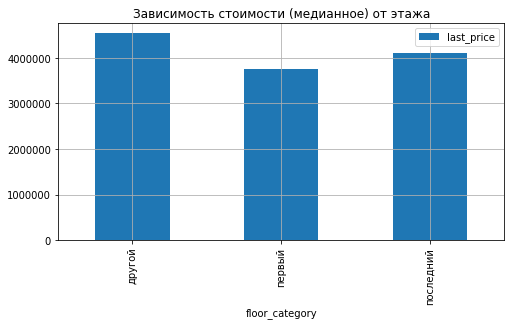

In [91]:
(df.pivot_table(index='floor_category',values='last_price', aggfunc ='median' )
 .plot(grid=True, figsize=(8,4),kind='bar')
)
plt.title('Зависимость стоимости (медианное) от этажа')
plt.show()

По графику видно, что cамые дешевые квартиры на 1 этаже, затем на последнем. Квартиры со 2 и до предпоследнего этажа самые дорогие

Text(0.5, 1.0, 'Зависимость стоимости от этажа')

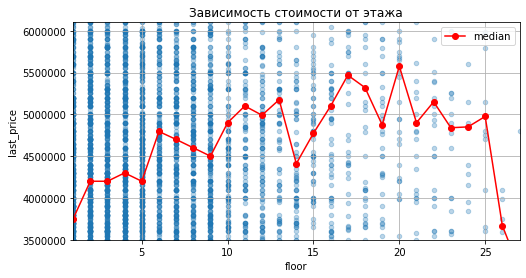

In [92]:
ax=df.plot(x='floor', y='last_price', kind='scatter', ylim = (0.35*10**7, 0.61*10**7),alpha=0.3, figsize=(8,4),grid=True) 
df.groupby('floor')['last_price'].agg(['median']).plot(ax = ax,y = 'median',style = '-or',legend = True, label = 'median',grid=True)
plt.title('Зависимость стоимости от этажа')

**4.4.5. Зависимость стоимости недвижимости от даты публикации объявленияа**

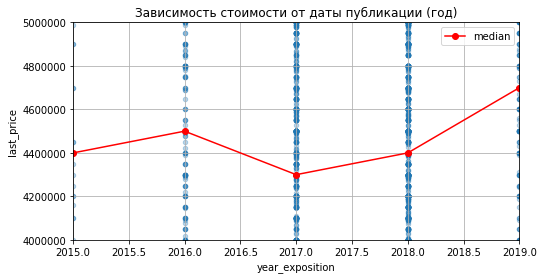

In [93]:
ax=df.plot(x='year_exposition', y='last_price', kind='scatter',ylim = (0.4*10**7, 0.5*10**7),xlim=(2014,2019), alpha=0.3, figsize=(8,4), grid=True)
df.groupby('year_exposition')['last_price'].agg(['median']).plot(ax = ax,y = 'median',style = '-or',legend = True, label = 'median',grid=True)
plt.title('Зависимость стоимости от даты публикации (год)')
plt.show()

Рассчитаем коэффициент корреляции Пирсона:

In [94]:
print('Коэффициент корреляции  Пирсона:',df['year_exposition'].corr(df['last_price']))

Коэффициент корреляции  Пирсона: 0.004935495241607387


По графикам видно, что небольшие скачки цен  в зависости от года есть. Прямой зависимости нет. Скачки могут быть связаны с курсом доллара, политикой в  сфере строительства, кредитованием  и т.д

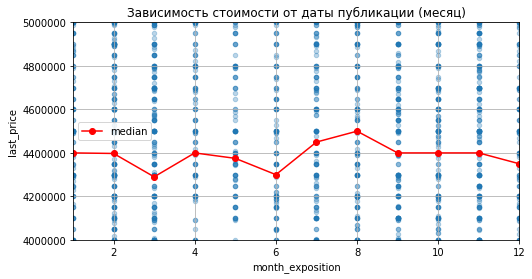

In [95]:
ax=df.plot(x='month_exposition', y='last_price', kind='scatter',ylim = (0.4*10**7, 0.5*10**7),xlim=(2014,2019), alpha=0.3, figsize=(8,4), grid=True)
df.groupby('month_exposition')['last_price'].agg(['median']).plot(ax = ax,y = 'median',style = '-or',legend = True, label = 'median',grid=True)
plt.title('Зависимость стоимости от даты публикации (месяц)')
plt.show()

In [96]:
print('Коэффициент корреляции  Пирсона:',df['month_exposition'].corr(df['last_price']))

Коэффициент корреляции  Пирсона: 0.008035142221396804


По графикам видно, что стоимость квартиры не зависит от месяца продажи

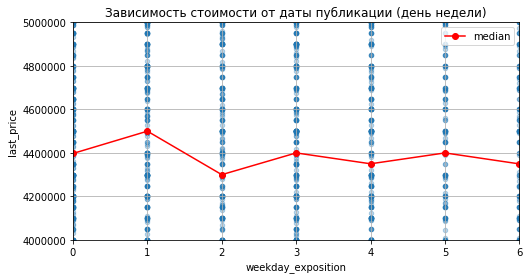

In [97]:
ax=df.plot(x='weekday_exposition', y='last_price', kind='scatter',ylim = (0.4*10**7, 0.5*10**7),xlim=(2014,2019), alpha=0.3, figsize=(8,4), grid=True)
df.groupby('weekday_exposition')['last_price'].agg(['median']).plot(ax = ax,y = 'median',style = '-or',legend = True, label = 'median',grid=True)
plt.title('Зависимость стоимости от даты публикации (день недели)')
plt.show()

In [98]:
print('Коэффициент корреляции  Пирсона:',df['weekday_exposition'].corr(df['last_price']))

Коэффициент корреляции  Пирсона: -0.01247760062639781


По графикам видно, что стоимость квартиры не зависит от дня недели

### 4.5.  10  населённых пунктов с наибольшим числом объявлений

 Cредняя цена квадратного метра в этих населённых пунктах:

In [99]:
dic_10 = (df             
              .groupby('locality_name')['price_1_meter']
              .agg(['count', 'mean'])
              .sort_values(by='count', ascending=False)
              .head(10)
             )
display(dic_10)

,count,mean
locality_name,,
Санкт-Петербург,5197,104592.033481
Всеволожск,164,66562.445122
Мурино,162,87114.469136
поселок Шушары,149,78657.906040
Колпино,134,73993.611940
Пушкин,121,98312.429752
Кудрово,118,96038.203390
поселок Парголово,91,89716.505495
Петергоф,89,83462.943820


Сортировка по средней стоимости квадратного метра

In [100]:
dic_10.sort_values(by='mean', ascending=False)

,count,mean
locality_name,,
Санкт-Петербург,5197,104592.033481
Пушкин,121,98312.429752
Кудрово,118,96038.203390
поселок Парголово,91,89716.505495
Мурино,162,87114.469136
Петергоф,89,83462.943820
поселок Шушары,149,78657.906040
Колпино,134,73993.611940
Гатчина,86,69095.430233



Мы получили список 10 населённых пунктов с наибольшим числом объявлений:
    
* Санкт-Петербург
* Всеволожск	
* Мурино	
* поселок Шушары	
* Колпино	
* Пушкин	
* Кудрово	
* поселок Парголово	
* Петергоф	
* Гатчина	
    
В Санкт-Петербурге самая высокая стоимость квадратного метра - 104 592, а во Всеволожске самая дешевая - 66 562.

### 4.6.  Определение центра Санкт-Петербурга

In [101]:
area_spb = df.query('locality_name == "Санкт-Петербург"')

Выделим 'cityCenters_nearest' > 0

In [102]:
area_spb = area_spb.loc[area_spb.loc[:,'cityCenters_nearest']>0]

Создадим столбец в км, округлим его.

In [103]:
area_spb['cityCenters_nearest_km'] = (area_spb['cityCenters_nearest'] / 1000).round().astype(int)

In [104]:
price_for_km = (area_spb
                         .pivot_table(index = 'cityCenters_nearest_km', values='last_price', aggfunc='median')
                         .reset_index())
display(price_for_km)

,cityCenters_nearest_km,last_price
0,0,7200000.0
1,1,7500000.0
2,2,8450000.0
3,3,6800000.0
4,4,7150000.0
5,5,7151396.5
6,6,6400000.0
7,7,5890000.0
8,8,6225000.0
9,9,5090000.0


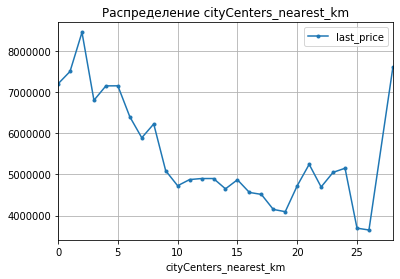

In [105]:
price_for_km.plot(x='cityCenters_nearest_km', y='last_price',style='.-', grid=True)
plt.title('Распределение cityCenters_nearest_km')
plt.show()

Где график сильно меняется — это и будет центральная зона. Это зона до 8 км

In [106]:
spb_center = area_spb.query('cityCenters_nearest_km <= 8')
print('Количесвто квартир в центре СПБ:',len(spb_center))
spb_ne_center = area_spb.query('cityCenters_nearest_km > 8')
print('Количесвто квартир в СПБ, но не в центре:',len(spb_ne_center))

Количесвто квартир в центре СПБ: 830
Количесвто квартир в СПБ, но не в центре: 4360


### 4.7. Анализ квартир в центре Санкт-Петербурга

Сравним площадь квартир  в центре и не в центре СПБ

Для анализа будем сравнивать определенные параметры квартир в центре СПБ с параметрами  квартир не в центре СПБ: 
* **spb_center**- df квартир в центре СПБ
* **spb_ne_center**-df квартир не в центре СПБ

**total_area** — площадь квартиры в квадратных метрах (м²)

In [107]:
spb_center['total_area'].describe()

count    830.000000
mean      60.514434
std       19.645328
min       12.000000
25%       45.525000
50%       58.545000
75%       73.875000
max      115.000000
Name: total_area, dtype: float64

In [108]:
spb_ne_center['total_area'].describe()

count    4360.000000
mean       51.388560
std        16.300399
min        15.000000
25%        39.000000
50%        47.800000
75%        61.000000
max       115.000000
Name: total_area, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

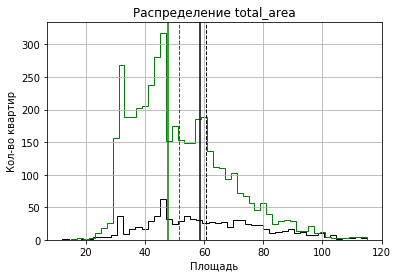

In [109]:
spb_center['total_area'].hist(bins=50, histtype='step', color='black')
spb_ne_center['total_area'].hist(bins=50, histtype='step',color='green')
#среднее значение  в центре СПБ( пунктирная черная линия)
plt.axvline(spb_center['total_area'].mean(), color='black', linestyle='dashed', linewidth=1)
#медианное значение в центре СПБ(сплошная черная линия)
plt.axvline(spb_center['total_area'].median(), color='black')
#среднее значение  не в центре СПБ( пунктирная зеленая)
plt.axvline(spb_ne_center['total_area'].mean(), color='green', linestyle='dashed', linewidth=1)
#медианное значение не в центре СПБ(сплошная зеленая линия)
plt.axvline(spb_ne_center['total_area'].median(), color='green')
plt.title('Распределение total_area')
plt.xlabel('Площадь')
plt.ylabel('Кол-во квартир')
plt.show


Средняя и медианная площадь квартир в центре больше. Вероятнее всего на это влияет сстарый фонд и элитное жилье.

**last_price**— цена на момент снятия с публикации

In [110]:
spb_center['last_price'].describe()

count    8.300000e+02
mean     6.891498e+06
std      2.094790e+06
min      2.250000e+06
25%      5.300000e+06
50%      6.650000e+06
75%      8.461263e+06
max      1.185000e+07
Name: last_price, dtype: float64

In [111]:
spb_ne_center['last_price'].describe()

count    4.360000e+03
mean     5.181165e+06
std      1.785505e+06
min      1.200000e+06
25%      3.900000e+06
50%      4.750000e+06
75%      6.000000e+06
max      1.180000e+07
Name: last_price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

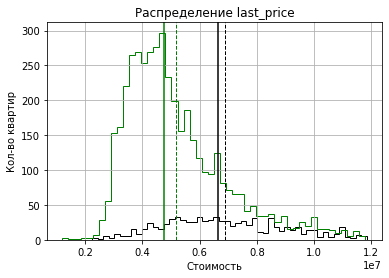

In [112]:
spb_center['last_price'].hist(bins=50, histtype='step', color='black')
spb_ne_center['last_price'].hist(bins=50, histtype='step',color='green')
#среднее значение  в центре СПБ(пунктирная черная линия)
plt.axvline(spb_center['last_price'].mean(), color='black', linestyle='dashed', linewidth=1)
#медианное значение в центре СПБ(сплошная черная линия)
plt.axvline(spb_center['last_price'].median(), color='black')
#среднее значение  не в центре СПБ (пунктирная зеленая линия)
plt.axvline(spb_ne_center['last_price'].mean(), color='green', linestyle='dashed', linewidth=1)
#медианное значение не в центре СПБ(сплошная зеленая линия)
plt.axvline(spb_ne_center['last_price'].median(), color='green')
plt.title('Распределение last_price')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во квартир')
plt.show


Средняя и медианная стоимость квартир в центре больше, не удивительно. Судить надо по цене за квадратный метр:

In [113]:
spb_center['price_1_meter'].describe()

count       830.000000
mean     117802.585542
std       28489.067041
min       59523.000000
25%       96666.000000
50%      112922.000000
75%      134164.250000
max      240000.000000
Name: price_1_meter, dtype: float64

In [114]:
spb_ne_center['price_1_meter'].describe()

count      4360.000000
mean     102046.247248
std       19292.431112
min       24439.000000
25%       88709.000000
50%      100000.000000
75%      113594.000000
max      216015.000000
Name: price_1_meter, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

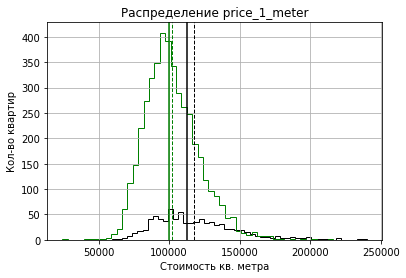

In [115]:
spb_center['price_1_meter'].hist(bins=50, histtype='step', color='black')
spb_ne_center['price_1_meter'].hist(bins=50, histtype='step',color='green')
#среднее значение  в центре СПБ(пунктирная черная линия)
plt.axvline(spb_center['price_1_meter'].mean(), color='black', linestyle='dashed', linewidth=1)
#медианное значение в центре СПБ(сплошная черная линия)
plt.axvline(spb_center['price_1_meter'].median(), color='black')
#среднее значение  не в центре СПБ( пунктирная зеленаячерная)
plt.axvline(spb_ne_center['price_1_meter'].mean(), color='green', linestyle='dashed', linewidth=1)
#медианное значение не в центре СПБ(сплошная зеленая линия)
plt.axvline(spb_ne_center['price_1_meter'].median(), color='green')
plt.title('Распределение price_1_meter')
plt.xlabel('Стоимость кв. метра')
plt.ylabel('Кол-во квартир')
plt.show


Средняя и медианная стоимость квадратного метра в центре больше.

**rooms**— число комнат

In [116]:
spb_center['rooms'].describe()

count    830.000000
mean       2.189157
std        0.898533
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64

In [117]:
spb_ne_center['rooms'].describe()

count    4360.000000
mean        1.895183
std         0.860158
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

Предпочтения у людей в центре и на окраинах одинаковые, самые популярные-это 2-х комнатные квартиры

**ceiling_height** — высота потолков (м)

В центре СПБ  в основном старый фонд, на окраинах обычные панельки. В центре высота потолков должна быть заметно выше. 

In [118]:
spb_center['ceiling_height'].describe()

count    830.000000
mean       2.845855
std        0.220995
min        2.400000
25%        2.700000
50%        2.840000
75%        3.000000
max        3.220000
Name: ceiling_height, dtype: float64

In [119]:
spb_ne_center['ceiling_height'].describe()

count    4360.000000
mean        2.637372
std         0.141151
min         2.400000
25%         2.500000
50%         2.600000
75%         2.700000
max         3.200000
Name: ceiling_height, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

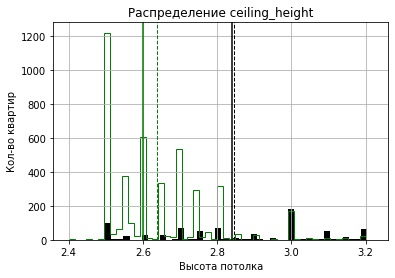

In [120]:
spb_center['ceiling_height'].hist(bins=50, histtype='bar', color='black')
spb_ne_center['ceiling_height'].hist(bins=50, histtype='step',color='green')
#среднее значение  в центре СПБ(пунктирная черная линия)
plt.axvline(spb_center['ceiling_height'].mean(), color='black', linestyle='dashed', linewidth=1)
#медианное значение в центре СПБ(сплошная черная линия)
plt.axvline(spb_center['ceiling_height'].median(), color='black')
#среднее значение  не в центре СПБ( пунктирная зеленаячерная)
plt.axvline(spb_ne_center['ceiling_height'].mean(), color='green', linestyle='dashed', linewidth=1)
#медианное значение не в центре СПБ(сплошная зеленая линия)
plt.axvline(spb_ne_center['ceiling_height'].median(), color='green')
plt.title('Распределение ceiling_height')
plt.xlabel('Высота потолка')
plt.ylabel('Кол-во квартир')
plt.show


Да, в центре высота потолков выше.

 **Факторы, которые влияют на стоимость квартиры**

На основе предудыщего анализа выделим факторы

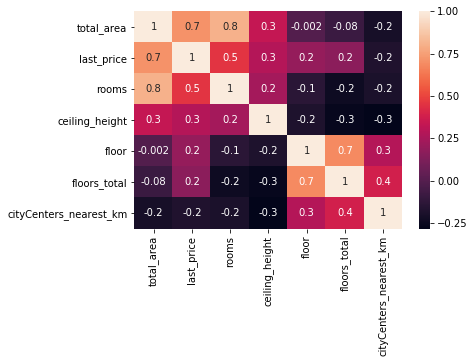

In [121]:
sns.heatmap(spb_center[['total_area','last_price','rooms','ceiling_height','floor','floors_total','cityCenters_nearest_km'] ].corr(),annot=True, fmt='.1g')

In [122]:
spb_center.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price')

,last_price
floor_category,
первый,5.926519e+06
последний,6.878486e+06
другой,7.079214e+06


Факторы влияющие на стоимость квартиры в центре и не в центре СПБ ничем не отличаются.

## Общий вывод


Мы изучили факторы, которые могут влиять на стоимость квартир: 
    
* Самый главные фактор - площадь квартиры. Чем больше  площадь квартиры - тем дороже стоимость жилья.  К площади квартиры относятся и такие исследуемые параметры как количество комнат,  площадь кухни+ жилая площадь. Все они показывают более слабую зависимость, но сильно зависят от общей площади.  
    
* Расстояние до центра города - 2-ой фактор по важности. Чем дальше удаленность от центра города, тем дешевле квадратный метр.

Если отвечать на вопрос о выделение основных факторов, влияющих на стоимость жилья, мы бы ответили - это площадь квартиры и расположение.
     
Не мало важным фактором является этаж, на котором распологается квартира. Выяснили, что люди охотнее берут не на первом и не на последнем этаже. В связи с тем, что спрос рождает предложение квартиры на первом и последнем этажах стоят дешевле. В среднем  стоимость квартиры растет с увеличением этажа- но это не строгое утверждение.  
      
    

Если рассмотреть временное промежуток, то с 2015 года стоимость жилья подорожало. Однако были промежутки,когда стоимсть жилья падала ниже 2015 года. Все же на этот фактор играет уровень инфляции в стране, курс доллара, государственные программы.

Такие параметры, как наличие парков и водоемов, расстояние до них- показывают крайне слабую зависимость,а где-то вообще ее нет.  
    

Мы изучили параметры, влияющие на стоимость квартиры по всей таблице, так же отдельно рассмотрели СПБ и его центр.


>Факторы влияющие на стоимость квартиры в центре и не в центре СПБ ничем не отличаются.


Такая же тенденция и для пригорода.  
  
Самое дороге жилье( рассмотрим средний квадартный метр), на основе предоставленной таблицы в Зеленогорске- 108 349, когда в СПБ - 104 592, а самое дешевое в деревня Вахнова Кара-11 688.